In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install h5py
import h5py

from PIL import Image

Training Data Sourced from [loosgagnet Roofline-Extraction via Github]('https://github.com/loosgagnet/Roofline-Extraction')

This dataset was created by the research team leading: [2D Image-To-3D Model: Knowledge-Based 3D Building Reconstruction (3DBR) Using Single Aerial Images and Convolutional Neural Networks (CNNs)]('https://doi.org/10.3390/rs11192219')

It consists of cropped images, nDSMs, and roof elements including three classes of eaves (red), ridges (green) and hips (blue)

---
Citation: Fatemeh Alidoost, Hossein Arefi, Federico Tombari; “2D Image-To-3D Model: Knowledge-Based 3D Building Reconstruction (3DBR) Using Single Aerial Images and Convolutional Neural Networks (CNNs)”, Remote Sens. 2019, 11, 2219, [https://doi.org/10.3390/rs11192219]('https://doi.org/10.3390/rs11192219')

In [6]:
# Import Roofline Training Data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html < Unable to read the available .mat data
# mat = scipy.io.loadmat('../data/training_data/imdb.mat')

mat = h5py.File('../data/training_data/imdb.mat','r')

<HDF5 file "imdb.mat" (mode r)>

In [37]:
mat.name

'/'

In [28]:
list(mat.keys())

['#refs#', 'imdb']

In [29]:
mat_imdb = mat['imdb']

In [38]:
mat_imdb.name

'/imdb'

##### Extract Images

In [66]:
mat_img = mat_imdb['images']

In [67]:
ar_img = np.array(mat_img)

In [68]:
ar_img[0].shape

(3, 224, 224)

In [69]:
# Swapping Axes to x,y, color channel
ar_img = np.moveaxis(ar_img, 1,3)
ar_img[0].shape

(224, 224, 3)

In [70]:
ar_img[0][0][:5]

array([[91., 70., 63.],
       [88., 65., 58.],
       [93., 70., 62.],
       [93., 70., 63.],
       [87., 68., 59.]], dtype=float32)

In [71]:
# Color Channels are provided as floats, converting to a 0-1 range to enable plotting via matplotlib
ar_img = ar_img / 255

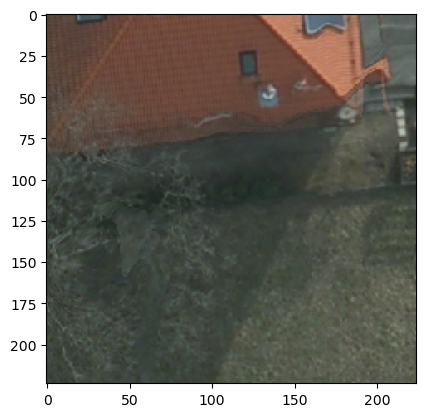

In [72]:
plt.imshow(ar_img[0], vmin=0, vmax=1);

##### Extract Masks

In [73]:
mat_imdb.keys()

<KeysViewHDF5 ['depths', 'elements', 'images']>

In [75]:
mat_elem = mat_imdb['elements']
mat_elem

<HDF5 dataset "elements": shape (1670, 3, 224, 224), type "<f4">

In [89]:
arr_elem = np.array(mat_elem)
arr_elem.shape

(1670, 3, 224, 224)

In [90]:
# Swapping axes
arr_elem = np.moveaxis(arr_mat, 1,3)
arr_elem.shape

(1670, 224, 224, 3)

In [91]:
arr_elem[0][0][:5]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [106]:
arr_elem[0].max()

1

In [111]:
# Colors are provided in floats ranging 0-1, converting to integer
arr_elem = (arr_elem * 255).astype(int).astype(np.uint8)

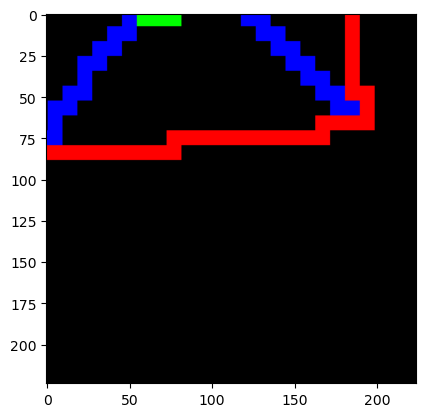

In [114]:
plt.imshow(arr_elem[0], vmin = 0, vmax = 255);